# Rule Based Classification
📌 **Rule-based classifiers** are just another type of classifier which makes the class decision depending by using various “if..else” rules. These rules are easily interpretable and thus these classifiers are generally used to generate descriptive models. The condition used with “if” is called the antecedent and the predicted class of each rule is called the consequent. If you want to read more about this topic, you can visit this <a href="https://www.geeksforgeeks.org/rule-based-classifier-machine-learning/">site</a>.

# Problem Definition
📌 A game company wants to create level-based new customer definitions (personas) using some features of its customers, and to create segments according to these new customer definitions and to estimate how much the new customers can earn on average according to these segments.

# Dataset
📌 The Persona.csv dataset contains the prices of the products sold by an international game company and some demographic information of the users who buy these products. The data set consists of records created in each sales transaction. This means that the table is not deduplicated. In other words, a user with certain demographic characteristics may have made more than one purchase.
# Variables
* *PRICE*: Customer spend amount,
* *SOURCE*: The type of device the customer is connecting to (IOS/Android),
* *SEX*: Gender of the customer,
* *COUNTRY*: Country of the customer,
* *AGE*: Age of the customer

### Let's add the necessary libraries and run our work through them.


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
persona = pd.read_csv("/content/persona.csv")
df = persona.copy()
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


### Let's write and run our function called chek_df to get general information about the data

In [24]:
def check_df(dataframe,head=5):
  print("################################ Head ################################\n")
  print(dataframe.head(head))
  print("################################ Tail ################################\n")
  print(dataframe.tail(head))
  print("################################ Shape ################################\n")
  print(dataframe.shape)
  print("################################ Types ################################\n")
  print(dataframe.dtypes)
  print("################################ NA ################################\n")
  print(dataframe.isnull().sum())
  print("################################ Qurtiles ################################\n")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [25]:
check_df(df)

################################ Head ################################

   PRICE   SOURCE   SEX COUNTRY  AGE
0     39  android  male     bra   17
1     39  android  male     bra   17
2     49  android  male     bra   17
3     29  android  male     tur   17
4     49  android  male     tur   17
################################ Tail ################################

      PRICE   SOURCE     SEX COUNTRY  AGE
4995     29  android  female     bra   31
4996     29  android  female     bra   31
4997     29  android  female     bra   31
4998     39  android  female     bra   31
4999     29  android  female     bra   31
################################ Shape ################################

(5000, 5)
################################ Types ################################

PRICE       int64
SOURCE     object
SEX        object
COUNTRY    object
AGE         int64
dtype: object
################################ NA ################################

PRICE      0
SOURCE     0
SEX        0
COUNTRY    0


### Capturing categorical and numerical variables

In [26]:
def grab_col_names(dataframe,cat_th=10,car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["int","float"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes in ["category","object"]]
  all_cat_cols = cat_cols + num_but_cat
  all_cat_cols = [col for col in all_cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int","float"]]
  num_cols = [col for col in num_cols if col not in all_cat_cols]

  #Print Categorical and Numerical Variables
  print(f"Observations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f"Cat_cols: {len(all_cat_cols)}")
  print(f"Num_but_cat: {len(num_but_cat)}")
  print(f"Num_cols: {len(num_cols)}")
  print(f"Cat_but_car: {len(cat_but_car)}")

  return all_cat_cols, num_cols, cat_but_car

In [27]:
all_cat_cols,num_cols,cat_but_car = grab_col_names(df)

Observations: 5000
Variables: 5
Cat_cols: 4
Num_but_cat: 1
Num_cols: 1
Cat_but_car: 0


### General Exploration for Categorical Data

In [28]:
def cat_summary(dataframe,plot=False):
  for col_name in all_cat_cols:
    print("################################ Unique Observations of Categorical Data ################################")
    print("The unique number of " + col_name + " : " + str(dataframe[col_name].nunique()))

    print("################################ Frequency of Categorical Data ################################")
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    
    if plot:
      sns.countplot(x=dataframe[col_name], data=dataframe)
      plt.show(block=True)

################################ Unique Observations of Categorical Data ################################
The unique number of SOURCE : 2
################################ Frequency of Categorical Data ################################
         SOURCE  Ratio
android    2974  59.48
ios        2026  40.52


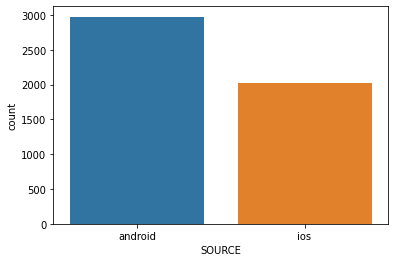

################################ Unique Observations of Categorical Data ################################
The unique number of SEX : 2
################################ Frequency of Categorical Data ################################
         SEX  Ratio
female  2621  52.42
male    2379  47.58


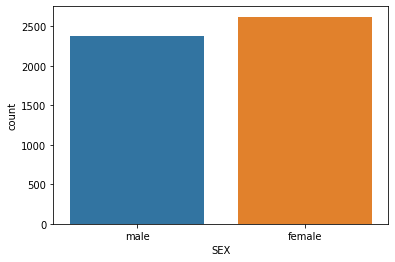

################################ Unique Observations of Categorical Data ################################
The unique number of COUNTRY : 6
################################ Frequency of Categorical Data ################################
     COUNTRY  Ratio
usa     2065  41.30
bra     1496  29.92
deu      455   9.10
tur      451   9.02
fra      303   6.06
can      230   4.60


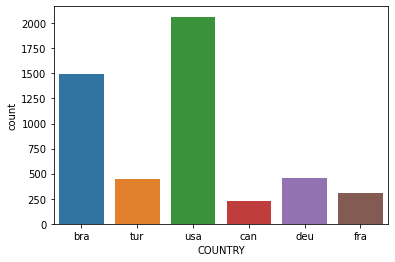

################################ Unique Observations of Categorical Data ################################
The unique number of PRICE : 6
################################ Frequency of Categorical Data ################################
    PRICE  Ratio
29   1305  26.10
39   1260  25.20
49   1031  20.62
19    992  19.84
59    212   4.24
9     200   4.00


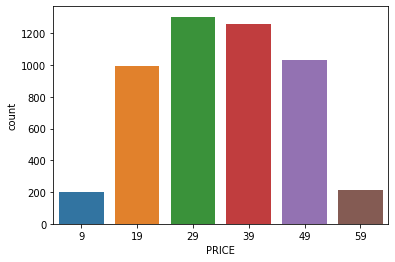

In [29]:
cat_summary(df,plot=True)

### General Exploration for Numerical Data

In [30]:
def num_summary(dataframe,plot=False):
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  for col_name in num_cols:
    print("################################ Summary Statistics of " + col_name + " ################################")
    print(dataframe[col_name].describe(quantiles).T)

    if plot:
      dataframe[col_name].hist()
      plt.xlabel(col_name)
      plt.title(col_name)
      plt.show(block=True)

################################ Summary Statistics of AGE ################################
count    5000.000000
mean       23.581400
std         8.995908
min        15.000000
5%         15.000000
10%        15.000000
20%        16.000000
30%        17.000000
40%        19.000000
50%        21.000000
60%        23.000000
70%        26.000000
80%        30.000000
90%        36.000000
95%        43.000000
99%        53.000000
max        66.000000
Name: AGE, dtype: float64


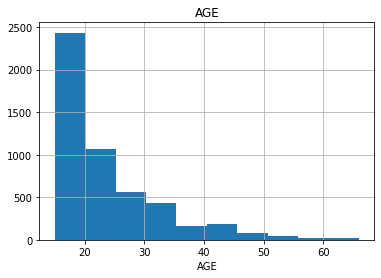

In [31]:
num_summary(df,plot=True)

### Data Analysis

In [32]:
def data_analysis(dataframe):
  print("Unique Values of Source: " , dataframe["SOURCE"].nunique())
  print("##############################################")
  print(pd.DataFrame({'Frequency of Source': dataframe["SOURCE"].value_counts()}))
  print("##############################################")
  print("Unique of Price: ", dataframe["PRICE"].nunique())
  print("##############################################")
  print(pd.DataFrame({'Number of product sales by price': dataframe["PRICE"].value_counts()}))
  print("##############################################")
  print(pd.DataFrame({'Number of product sales by country': dataframe["COUNTRY"].value_counts()}))
  print("##############################################")
  print('Total & average amount of sales by country', dataframe.groupby(["COUNTRY"]).agg({'PRICE':["sum","mean"]}))
  print("##############################################")
  print("Count of sales by source", dataframe.groupby(["SOURCE"]).agg({'PRICE': 'count'}))
  print("##############################################")
  print("Average amount of sales by country", dataframe.groupby(["COUNTRY"]).agg({'PRICE': 'mean'}))
  print("##############################################")
  print("Average amount of sales by source", dataframe.groupby(["SOURCE"]).agg({'PRICE': 'mean'}))
  print("##############################################")
  print("Average amount of sales by source and country",dataframe.groupby(["SOURCE","COUNTRY"]).agg({'PRICE':'mean'}))

In [33]:
data_analysis(df)

Unique Values of Source:  2
##############################################
         Frequency of Source
android                 2974
ios                     2026
##############################################
Unique of Price:  6
##############################################
    Number of product sales by price
29                              1305
39                              1260
49                              1031
19                               992
59                               212
9                                200
##############################################
     Number of product sales by country
usa                                2065
bra                                1496
deu                                 455
tur                                 451
fra                                 303
can                                 230
##############################################
Total & average amount of sales by country          PRICE           
           sum       m

### Average PRICE in COUNTRY, SOURCE, SEX, AGE groupby

In [34]:
df.groupby(["COUNTRY","SOURCE","SEX","AGE"]).agg({'PRICE':'mean'}).head(5)

PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897

### To better see the output in the previous question, apply the sort_values method in descending order of PRICE. and Save the Output as agg_df.

In [35]:
agg_df = df.groupby(["COUNTRY","SOURCE","SEX","AGE"]).agg({'PRICE':'mean'}).sort_values(by='PRICE',ascending=False)
agg_df.head()

,,,,PRICE
COUNTRY,SOURCE,SEX,AGE,
bra,android,male,46,59.0
usa,android,male,36,59.0
fra,android,female,24,59.0
usa,ios,male,32,54.0
deu,android,female,36,49.0


### Converted the names in the index to variable names

In [36]:
agg_df = agg_df.reset_index()
agg_df

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0
...,...,...,...,...,...
343,usa,ios,female,38,19.0
344,usa,ios,female,30,19.0
345,can,android,female,27,19.0
346,fra,android,male,18,19.0


### Defining Persona

In [37]:
bins = [0,18,23,30,40,66]
labels = ['0_18' , '19_23' , '24_30' , '31_40' , '41_66']
agg_df["AGE_CAT"] = pd.cut(agg_df["AGE"],bins,labels=labels)
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,AGE_CAT
0,bra,android,male,46,59.0,41_66
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,24_30
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40


In [38]:
agg_df["CUSTOMERS_LEVEL_BASED"] = pd.DataFrame([str(row[0]).upper() + "_" 
                                                + str(row[1]).upper() + "_" 
                                                + str(row[2]).upper() + "_" 
                                                + str(row[5]).upper()  for row in agg_df.values])
agg_df[["CUSTOMERS_LEVEL_BASED","PRICE"]]

,CUSTOMERS_LEVEL_BASED,PRICE
0,BRA_ANDROID_MALE_41_66,59.0
1,USA_ANDROID_MALE_31_40,59.0
2,FRA_ANDROID_FEMALE_24_30,59.0
3,USA_IOS_MALE_31_40,54.0
4,DEU_ANDROID_FEMALE_31_40,49.0
...,...,...
343,USA_IOS_FEMALE_31_40,19.0
344,USA_IOS_FEMALE_24_30,19.0
345,CAN_ANDROID_FEMALE_24_30,19.0
346,FRA_ANDROID_MALE_0_18,19.0


In [39]:
agg_df = agg_df.groupby(["CUSTOMERS_LEVEL_BASED"]).agg({'PRICE':'mean'}).sort_values(by='PRICE',ascending=False)
agg_df = agg_df.reset_index()
agg_df

,CUSTOMERS_LEVEL_BASED,PRICE
0,FRA_ANDROID_FEMALE_24_30,45.428571
1,TUR_IOS_MALE_24_30,45.000000
2,TUR_IOS_MALE_31_40,42.333333
3,TUR_ANDROID_FEMALE_31_40,41.833333
4,CAN_ANDROID_MALE_19_23,40.111111
...,...,...
104,TUR_IOS_MALE_41_66,25.052632
105,TUR_IOS_MALE_19_23,24.833333
106,FRA_ANDROID_MALE_0_18,24.625000
107,CAN_ANDROID_FEMALE_24_30,19.000000


### Creating Segments based on Personas

In [40]:
agg_df["SEGMENT"] = pd.qcut(agg_df["PRICE"],4,labels=["D","C","B","A"])
agg_df.groupby(["SEGMENT"]).agg({'PRICE': ['mean','max','sum']})

PRICE                        
              mean        max          sum
SEGMENT                                   
D        29.206780  32.333333   817.789833
C        33.509674  34.077340   904.761209
B        34.999645  36.000000   944.990411
A        38.691234  45.428571  1044.663328

### Prediction 

In [46]:
def AGE_CAT(age):
  if age <= 18:
    AGE_CAT = "15_18"
    return AGE_CAT
  elif (age > 18 and age <= 23):
    AGE_CAT = "19_23"
    return AGE_CAT
  elif (age > 23 and age <= 30):
    AGE_CAT = "24_30"
    return AGE_CAT
  elif (age > 30 and age <= 40):
    AGE_CAT = "31_40"
    return AGE_CAT
  elif (age > 40 and age <= 66):
    AGE_CAT = "41_66"
    return AGE_CAT

COUNTRY = input("Enter a country name (USA/EUR/BRA/DEU/TUR/FRA): ")
SOURCE = input("Enter the operating system of phone (IOS/ANDROID): ")
SEX = input("Enter the gender (FEMALE/MALE): ")
AGE = int(input("Enter the age: "))
AGE_SEG = AGE_CAT(AGE)
new_user = COUNTRY.upper() + '_' + SOURCE.upper() + '_' + SEX.upper() + '_' + AGE_SEG
print(new_user)
print(agg_df[agg_df["CUSTOMERS_LEVEL_BASED"] == new_user])

Enter a country name (USA/EUR/BRA/DEU/TUR/FRA): fra
Enter the operating system of phone (IOS/ANDROID): ios
Enter the gender (FEMALE/MALE): female
Enter the age: 35
FRA_IOS_FEMALE_31_40
   CUSTOMERS_LEVEL_BASED      PRICE SEGMENT
78  FRA_IOS_FEMALE_31_40  32.818182       C
